In [1]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df = datasets.load_diabetes(return_X_y=False, as_frame=True)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# X_train.shape, y_train.shape
percentage = 0.8

# Get the index of the records that will be used for training. i.e. 80% of the data for training. The remaining will be used for testing
index_ = df.data.sample(frac=percentage, random_state=76).index
X_train = df.data.iloc[index_]
y_train = df.target.iloc[index_]

X_test = df.data.drop(index_)
y_test = df.target.drop(index_)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((354, 10), (354,), (88, 10), (88,))

In [3]:
X_train.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,-0.000610,0.000596,-0.001545,-0.000655,-0.001468,-0.001761,0.000165,-0.001058,0.000166,0.000139
std,0.047469,0.047667,0.047446,0.046077,0.045309,0.045988,0.048659,0.047484,0.047180,0.047761
min,-0.107226,-0.044642,-0.090275,-0.112399,-0.126781,-0.115613,-0.102307,-0.076395,-0.126097,-0.137767
25%,-0.037299,-0.044642,-0.035307,-0.035795,-0.033216,-0.030124,-0.036038,-0.039493,-0.033246,-0.030072
50%,0.005383,-0.044642,-0.008362,-0.005670,-0.004321,-0.003506,-0.006584,-0.002592,-0.002850,0.003064
75%,0.037168,0.050680,0.026937,0.028758,0.024574,0.026165,0.030232,0.034309,0.031657,0.027917
max,0.110727,0.050680,0.170555,0.132044,0.153914,0.198788,0.181179,0.185234,0.133597,0.135612


Let us try to see the distribution of data in the dataset. We know that the column 'sex' has two values. So the floating point value there doesn't really hold any value.

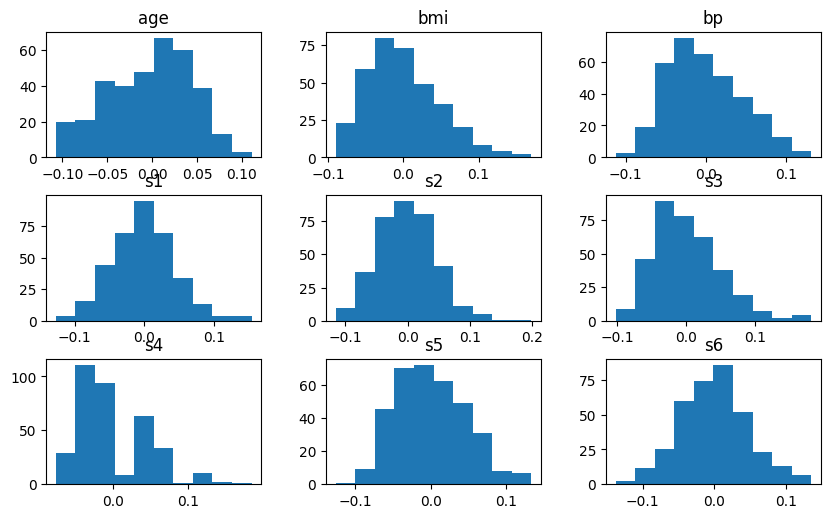

In [4]:
columns_ = ['age', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
X_train[columns_].hist(bins=10, figsize=(10, 8), layout=(4,3), grid=False)
plt.show()

We can see that by and large the continuous features in the dataset are normally distributed. This is a good thing as it will help us in training the model.

The next thing we can try to see is if some of the features are correlated with each other. This can be done by plotting a heatmap of the correlation matrix.

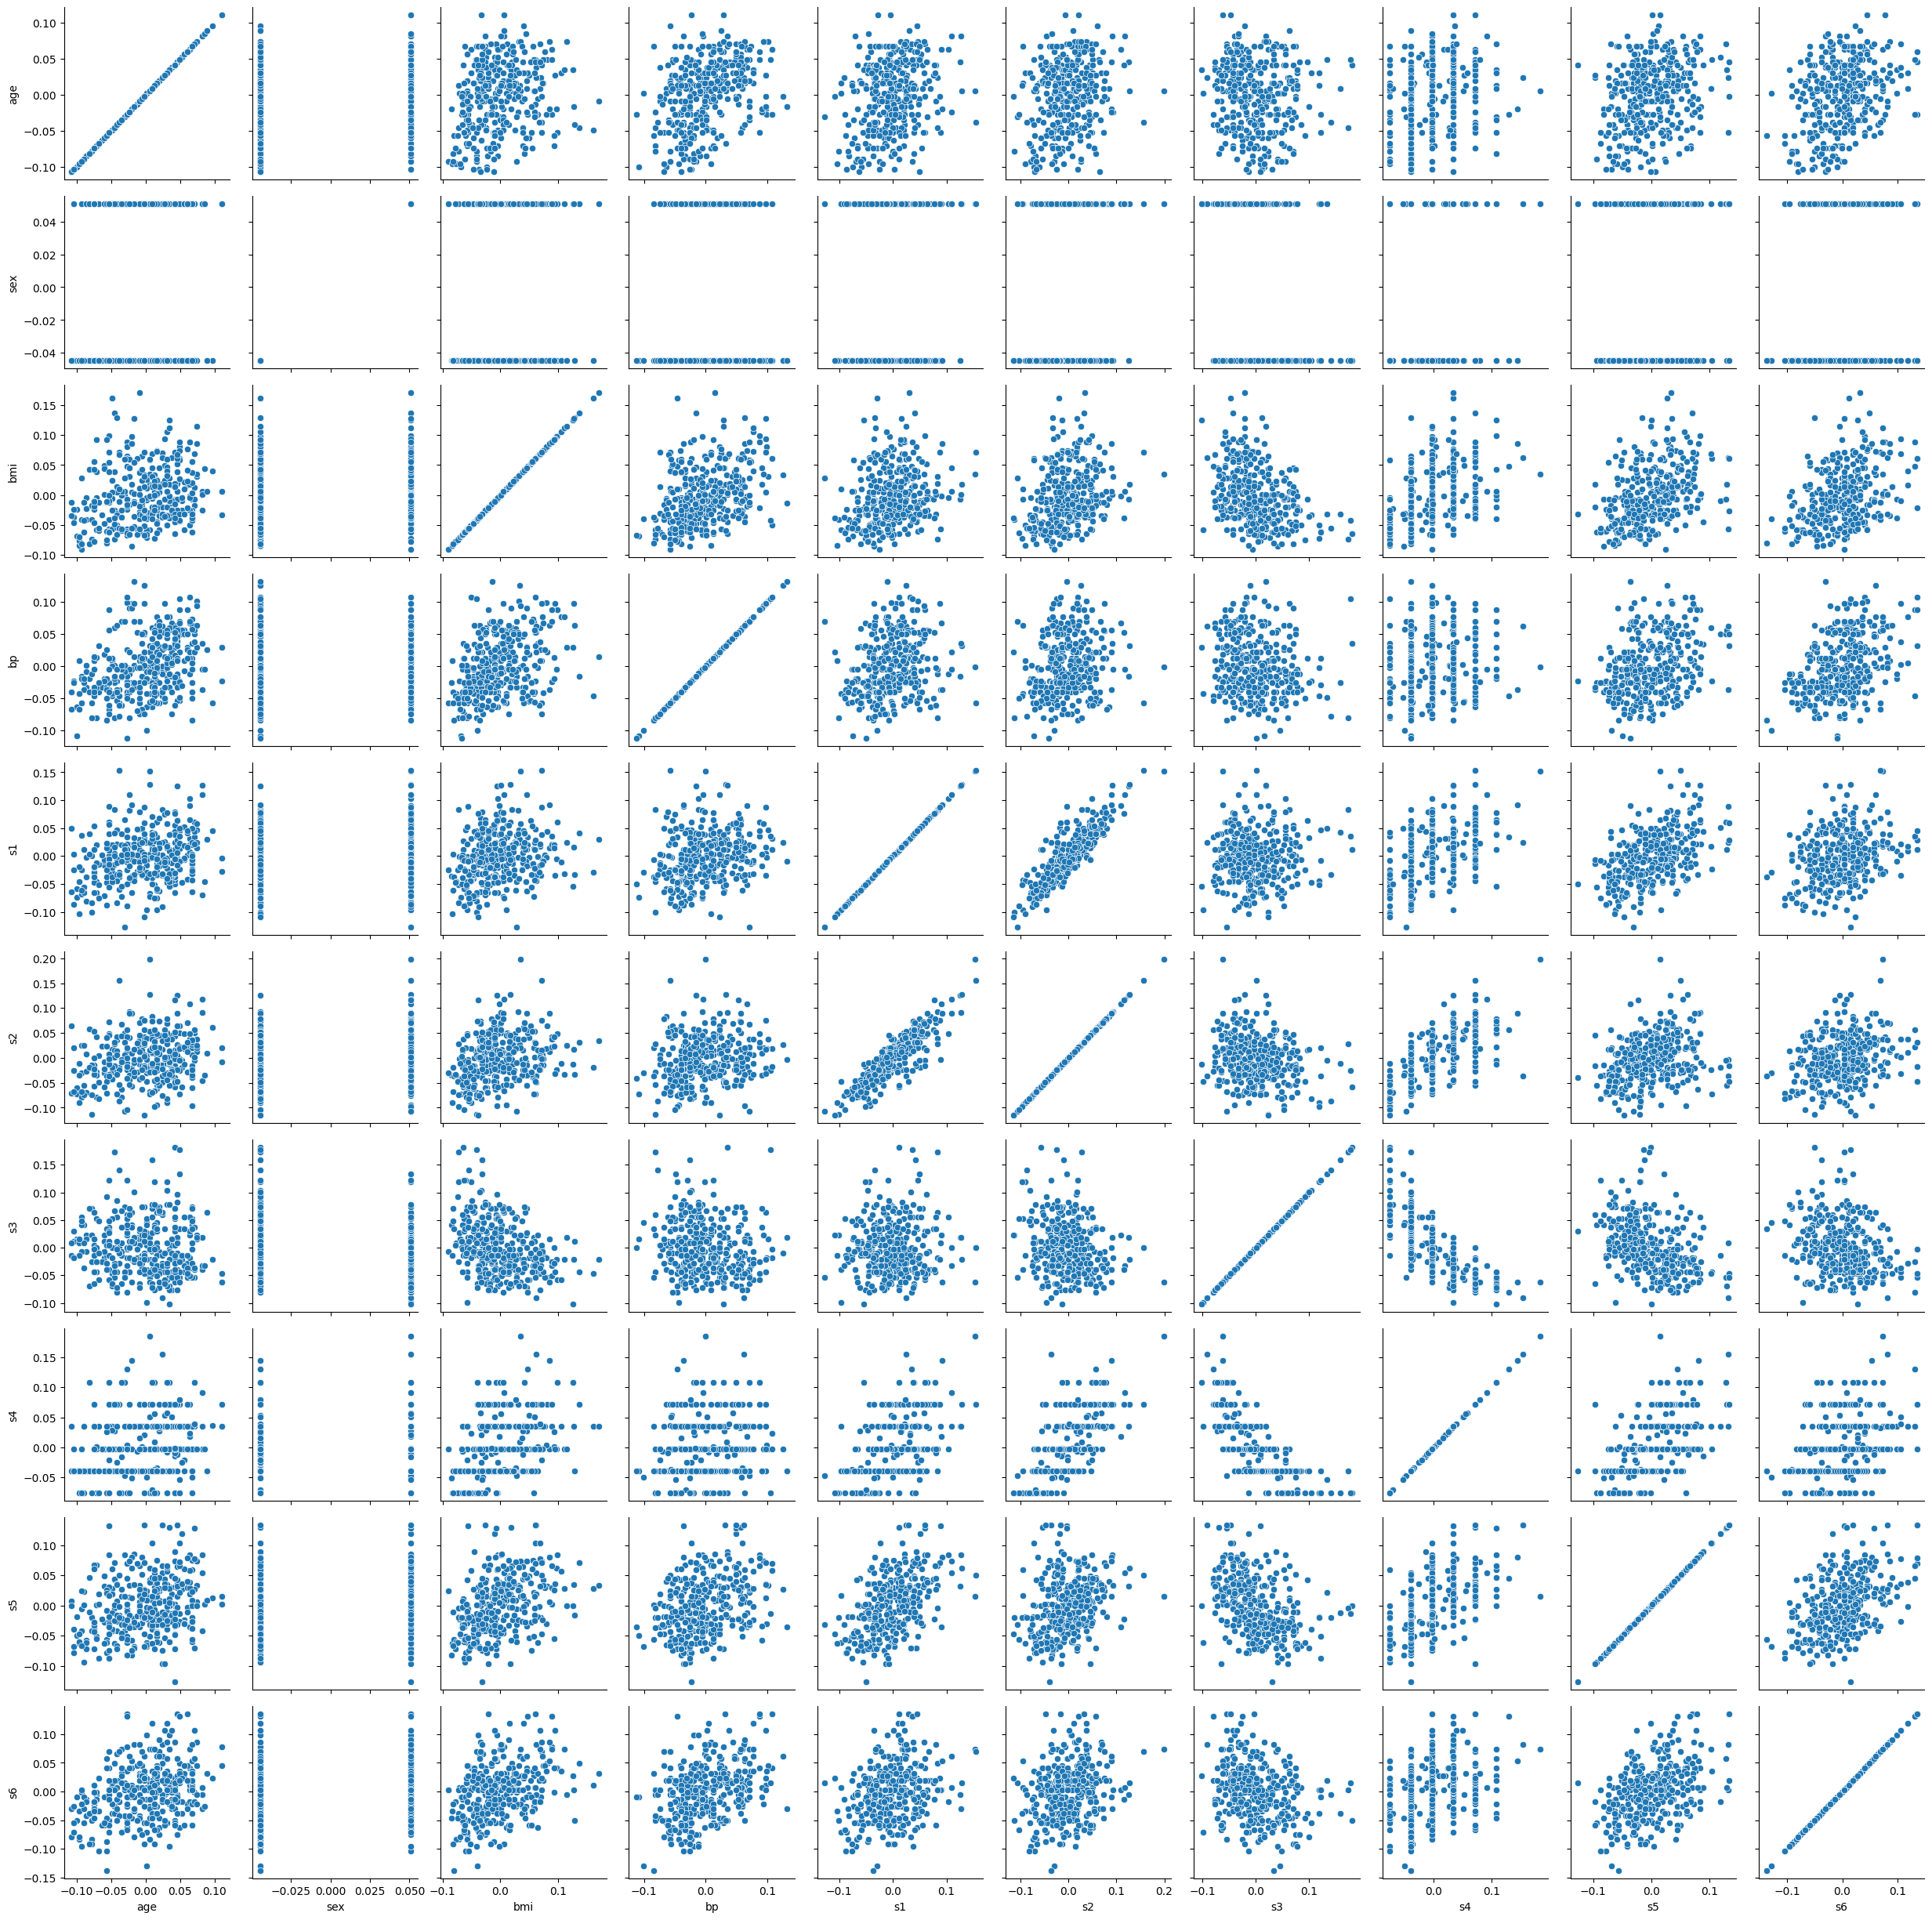

In [5]:
g = sns.PairGrid(X_train)
g.map(sns.scatterplot)

We can se that there isn't a very high correlation between the features.

The next step to do here is to train the linear regression model and see how it performs.

In [6]:
models = [('Linear Regression', linear_model.LinearRegression()), ('Ridge Regression', linear_model.Ridge(alpha=0.5))]

for (name, model) in models:
    print(name)
    model.fit(X_train, y_train)

    model.coef_, model.intercept_

    print("Coefficients: \n", model.coef_)
    
    y_predicted = model.predict(X_test)

    # The mean squared error
    print("Mean squared error: %.2f" % mean_squared_error(y_test, y_predicted))
    # The coefficient of determination: 1 is perfect prediction
    print("Coefficient of determination: %.2f" % r2_score(y_test, y_predicted))

    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    print("Cross-validated scores:", scores, " \n")

Linear Regression
Coefficients: 
 [  53.67253883 -297.77618746  530.84434994  301.20147503 -962.15741176
  659.16294892  119.02244023  159.97059508  837.57811102   43.28906244]
Mean squared error: 3466.28
Coefficient of determination: 0.43
Cross-validated scores: [0.39869443 0.52163872 0.53570987 0.43168268 0.55087421]  

Ridge Regression
Coefficients: 
 [  56.54048699 -149.45598154  367.74072977  208.69479768   -5.13568523
  -34.74133631 -183.98585977  128.17916646  310.52687582  110.33762198]
Mean squared error: 3434.97
Coefficient of determination: 0.44
Cross-validated scores: [0.33939138 0.47695344 0.4718895  0.41968298 0.52593174]  

